<a href="https://colab.research.google.com/github/swarup1606/DATA_SCIENCE_INTERNSHIP/blob/main/50_Startups_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
df= pd.read_csv('/content/50_Startups.csv')
df.head()


,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
dummy = pd.get_dummies(df["State"])

In [ ]:
df=pd.concat([dummy,df],axis=1)
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,True,165349.20,136897.80,471784.10,New York,192261.83
1,True,False,False,162597.70,151377.59,443898.53,California,191792.06
2,False,True,False,153441.51,101145.55,407934.54,Florida,191050.39
3,False,False,True,144372.41,118671.85,383199.62,New York,182901.99
4,False,True,False,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.head()


,California,Florida,New York,R&D Spend,Administration,Marketing Spend,State,Profit
0,False,False,True,165349.20,136897.80,471784.10,New York,192261.83
1,True,False,False,162597.70,151377.59,443898.53,California,191792.06
2,False,True,False,153441.51,101145.55,407934.54,Florida,191050.39
3,False,False,True,144372.41,118671.85,383199.62,New York,182901.99
4,False,True,False,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.columns


Index(['California', 'Florida', 'New York', 'R&D Spend', 'Administration',
       'Marketing Spend', 'State', 'Profit'],
      dtype='object')

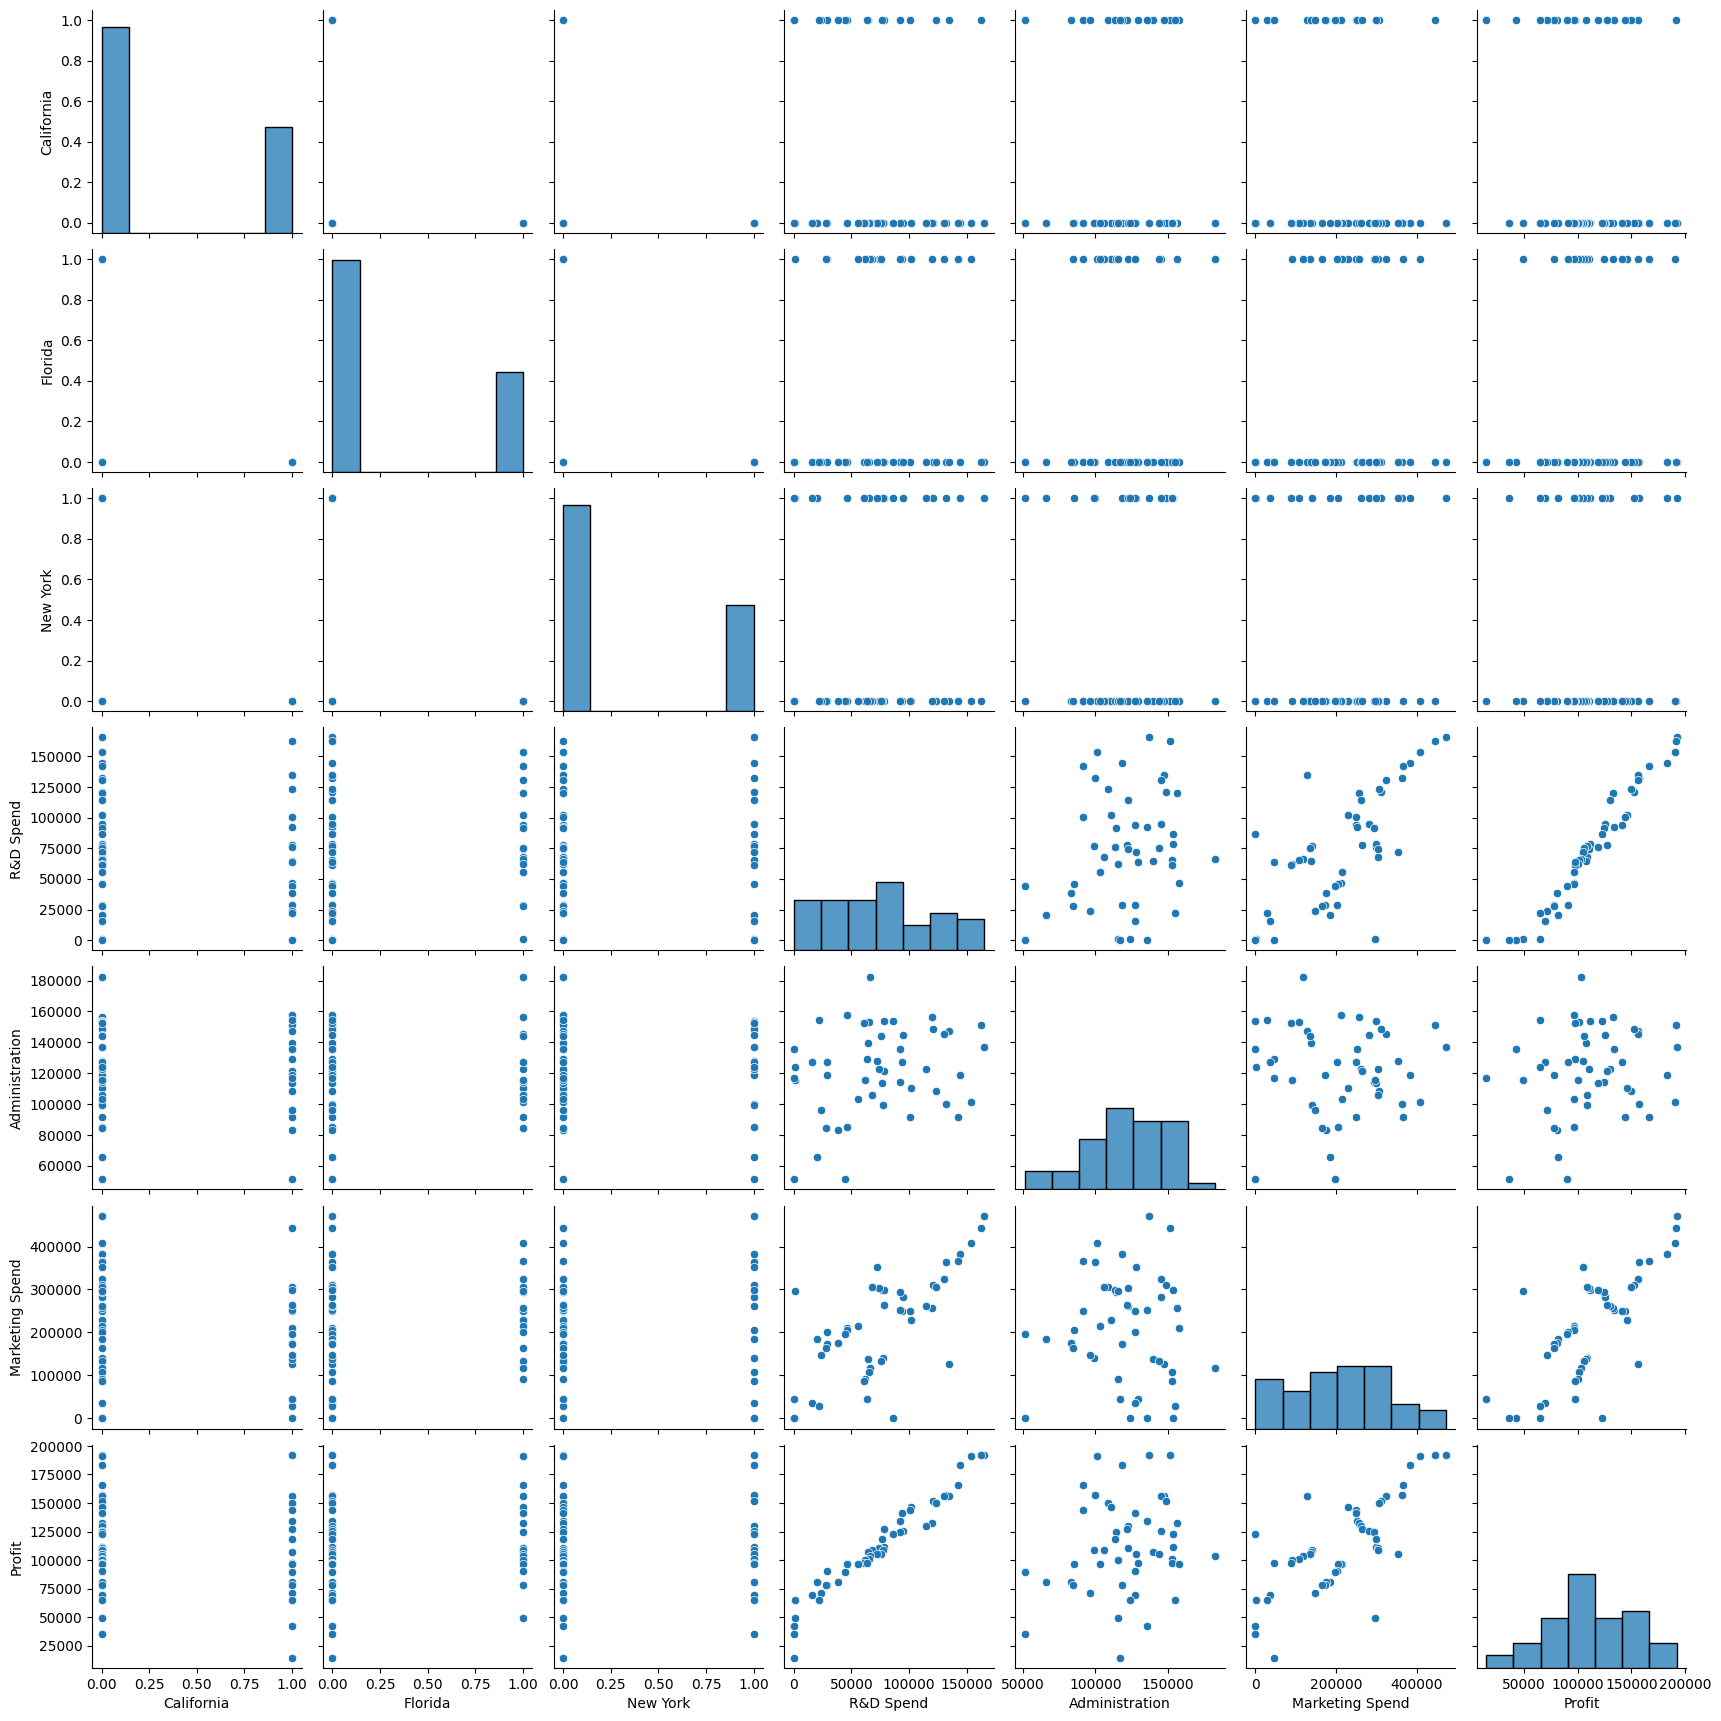

In [ ]:
sns.pairplot(df)

In [ ]:
x= df[['R&D Spend', 'Administration', 'Marketing Spend']]

In [ ]:
x.shape

(50, 3)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x= ss.fit_transform(x)

In [ ]:
y=df['Profit']

In [ ]:
y.shape

(50,)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2529)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((35, 3), (15, 3), (35,), (15,))

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([ 69533.16664444,  47448.43763811,  74260.53113412,  45815.68658428,
        69960.57995851, 134664.16838419, 112277.046548  ,  57396.29340551,
       116614.20697429, 192732.79877504, 155268.95699283, 189101.66047345,
       128284.51198814, 163297.64486409, 108834.88789459])

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [ ]:
mean_absolute_error(y_test,y_pred)

6949.449126339063

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.08988370694499252

In [ ]:
lr.score(x_test,y_test)

0.9664615426267987